<a href="https://colab.research.google.com/github/Ahnjihye/allinone_AI/blob/master/AIO_AI_day4_(%EC%99%84%EC%84%B1%EB%B3%B8)_kNN_%EB%B6%84%EB%A5%98_%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. 데이터 불러오고 확인해보기**

In [ ]:
# 방법1) 내 PC에 있는 파일 불러오기
 
from google.colab import files
uploaded = files.upload()

Saving Iris_1.csv to Iris_1.csv


In [ ]:
# 방법2) 깃허브에 있는 파일 불러오기

! git clone '링크 입력'

In [ ]:
import csv 
 
f = open('Iris_1.csv')       # 파일 오픈 
data = csv.reader(f)         # 파일 읽기 reader
next(data)                   # 파일 헤더 건너뛰기 
data = list(data)            # 파일 리스트로 바꾸기


In [ ]:
# 확인용
data[:5]

[['5.1', '3.5', 'Setosa'],
 ['4.9', '3', 'Setosa'],
 ['4.7', '3.2', 'Setosa'],
 ['4.6', '3.1', 'Setosa'],
 ['5', '3.6', 'Setosa']]

In [ ]:
# 꽃받침 길이/넓이 => 숫자(실수)로 변경

for row in data :
    row[0] = float(row[0])
    row[1] = float(row[1])

# 확인용
data[:5]

[[5.1, 3.5, 'Setosa'],
 [4.9, 3.0, 'Setosa'],
 [4.7, 3.2, 'Setosa'],
 [4.6, 3.1, 'Setosa'],
 [5.0, 3.6, 'Setosa']]

In [ ]:
# 함수 만들기(새로운 데이터를 입력하면 기존 데이터와 함께 시각화해주는 함수)

import matplotlib.pyplot as plt

def draw_graph(dot) :
    for row in data :

        if row[2] == 'Setosa' : 
            plt.scatter(row[0], row[1], color = 'indigo')
        elif row[2] == 'Virginica' : 
            plt.scatter(row[0], row[1], color = 'mediumvioletred')

        plt.scatter(dot[0], dot[1], color = 'orange', marker='*', s=200)

    plt.show()

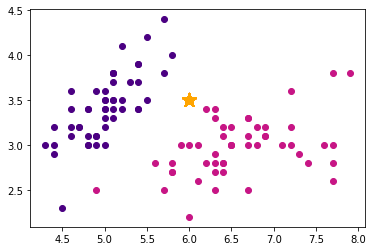

In [ ]:
# [단계0] 데이터 분포를 확인하기 위한 시각화

new = [6, 3.5]
draw_graph(new)

# **2. kNN 알고리즘에 따라 구현해보기 (단계별)**

In [ ]:
# 함수 만들기(두 점을 입력하면 거리를 리턴해주는 함수)

def calculate_distance(dot1, dot2) :

    # x좌표 차이
    x_dist = dot2[0] - dot1[0]
    # y좌표 차이
    y_dist = dot2[1] - dot1[1]
     
    # 두 점 사이의 거리 계산
    distance = (x_dist**2 + y_dist**2)**0.5

    return distance

In [ ]:
# [단계1] 새로운 데이터와 기존 데이터 사이의 거리를 각각 구해서 저장

for row in data :
    dist = calculate_distance(row[:2], new)
    row.append(dist)

In [ ]:
# 확인용
data[:5]

[[5.1, 3.5, 'Setosa', 0.9000000000000004],
 [4.9, 3.0, 'Setosa', 1.2083045973594568],
 [4.7, 3.2, 'Setosa', 1.334166406412633],
 [4.6, 3.1, 'Setosa', 1.456021977856104],
 [5.0, 3.6, 'Setosa', 1.004987562112089]]

In [ ]:
# [단계2] 거리가 가까운 순으로 기존 데이터 정렬

import operator

data.sort(key = operator.itemgetter(-1))

In [ ]:
# 확인용
data[:5]

[[6.2, 3.4, 'Virginica', 0.22360679774997916],
 [6.3, 3.4, 'Virginica', 0.31622776601683783],
 [6.3, 3.3, 'Virginica', 0.3605551275463989],
 [5.7, 3.8, 'Setosa', 0.4242640687119283],
 [5.5, 3.5, 'Setosa', 0.5]]

In [ ]:
# 함수 만들기(k개의 이웃을 살펴본 뒤, 더 많은 수의 이웃이 속한 카테고리로 분류해주는 함수)

def classify(k) :
    
    # 카테고리별 데이터 수를 저장할 변수 초기화
    num_A, num_B = 0, 0

    # 가장 가까운 k개의 이웃 살펴보기
    for row in data[:k] :
        if row[2] == 'Setosa' :
            num_A += 1
        elif row[2] == 'Virginica' :
            num_B += 1

    print('k =',k,'일 때 Setosa의 개수 :',num_A , ', Virginica의 개수 :', num_B)
    
    # 최종 분류하기
    if num_A > num_B :
        print('이 꽃은 Setosa 입니다.')
    elif num_B > num_A :
        print('이 꽃은 Virginica 입니다.')
    else :
        print('분류할 수 없습니다.')

In [ ]:
classify(7)

k = 7 일 때 Setosa의 개수 : 2 , Virginica의 개수 : 5
이 꽃은 Virginica 입니다.


# **3. 위 과정을 종합하여 kNN 함수로 만들기**

In [ ]:
# 함수 만들기(새로운 데이터와 k값을 입력하면 kNN알고리즘으로 분류해주는 함수)

def kNN(new, k) :

    # 데이터 시각화(확인용)
    draw_graph(new)
    
    # 각각의 거리를 구해서 저장
    for row in data :

        while len(row) > 3 : 
            row.pop()

        dist = calculate_distance(row, new)
        row.append(dist)
    
    # 거리가 가까운 순서대로 데이터 정렬
    data.sort(key = operator.itemgetter(-1))

    # 거리가 가까운 k개 데이터의 카테고리에 따라 새로운 데이터를 분류
    classify(k)

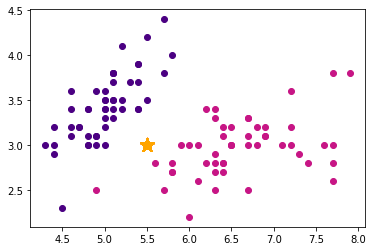

k = 7 일 때 Setosa의 개수 : 2 , Virginica의 개수 : 5
이 꽃은 Virginica 입니다.


In [ ]:
# 최종 확인

kNN([5.5,3], 7)

# **4. 사이킷런 라이브러리를 활용한 kNN**

In [ ]:
# 사이킷런 라이브러리에서 붓꽃 데이터 불러오기

from sklearn.datasets import load_iris

iris = load_iris()

In [ ]:
# 붓꽃 데이터의 구성 요소 살펴보기

iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
# 붓꽃 데이터에 대한 설명 살펴보기

print(iris.DESCR)

In [ ]:
# 붓꽃을 종류를 구분하는 속성 이름 살펴보기

iris.feature_names

In [ ]:
# 각 샘플의 속성값 살펴보기 

iris.data

In [ ]:
# 붓꽃의 품종 이름 살펴보기

iris.target_names

In [ ]:
# 각 샘플이 어떤 품종인지 살펴보기

iris.target

In [ ]:
# 학습을 위해 사용할 데이터 지정

X = iris.data
y = iris.target

In [ ]:
# 학습데이터와 시험데이터 분리

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
# kNN 알고리즘으로 학습 진행

from sklearn.neighbors import KNeighborsClassifier

kNN = KNeighborsClassifier(n_neighbors=7)
kNN.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [ ]:
# 새로운 데이터 분류해보기

x_new = [[6.5, 2.5, 3, 1], [4.2, 2.8, 1.2, 0.5], [6, 3.5, 6, 1.5]]
y_new = kNN.predict(x_new)
print(y_new)

[1 0 2]


In [ ]:
# 모델의 성능 평가(정확도 측정)

from sklearn import metrics

y_classified = kNN.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_classified)
print('정확도 :', accuracy)

정확도 : 0.9555555555555556
